In [1]:
# Heart Disease

'Heart Disease'

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier

from sklearn.metrics import (roc_curve, 
                             roc_auc_score, 
                             classification_report, 
                             confusion_matrix, 
                             accuracy_score, 
                             log_loss)

In [3]:
dataset_path = '/kaggle/input/heart-disease-dataset/heart.csv'
df = pd.read_csv(dataset_path)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


In [6]:
# STDep = ST depression induced by exercise relative to rest
# Slope =  slope of the peak exercise ST segment
df.columns = ['Age', 'Gender', 'ChestPainType', 'RestingBP', 'SerumCholesterol', 'FastingBS', 'RestingECG', 'MaxHeartRate', 'ExerciseInducedAngina', 'STDep', 'Slope', 'NumMajorVessels', 'Thal', 'Diagnosis']

<Axes: >

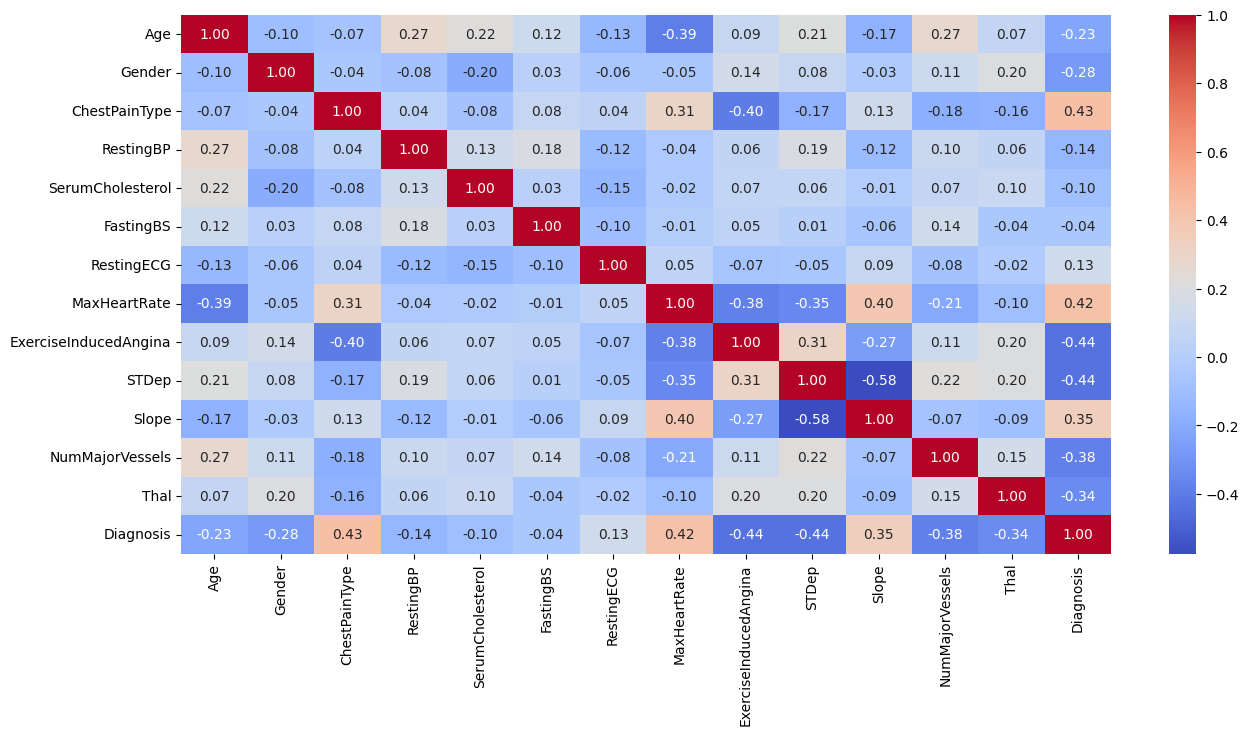

In [7]:
corr_mat = df.corr() 
#print(corr_mat) 
plt.figure(figsize=(15, 7)) 
sns.heatmap(corr_mat, annot=True, fmt = '.2f',cmap='coolwarm')

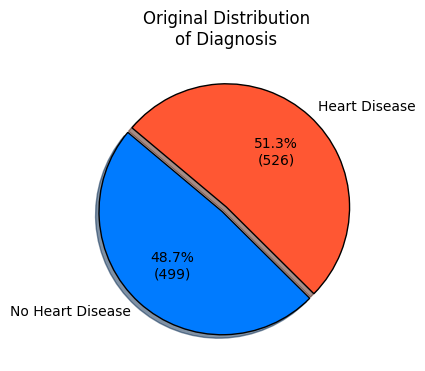

In [8]:
# EDA

diagnosis_cnts = df['Diagnosis'].value_counts()

labels = ['No Heart Disease', 'Heart Disease']
colors = [ '#007BFF', '#FF5733']

plt.figure(figsize=(4, 4)) 
plt.pie(diagnosis_cnts[[0, 1]], labels=labels, colors=colors, 
        autopct=lambda p: f'{p:.1f}%\n({int(round((p * sum(diagnosis_cnts) / 100))):,})', 
        startangle=140, explode=[0.05, 0], shadow=True, 
        wedgeprops={'edgecolor': 'black'})

plt.title("Original Distribution\nof Diagnosis")
plt.savefig('Dis_Original.png', dpi=600, bbox_inches='tight')
plt.show()

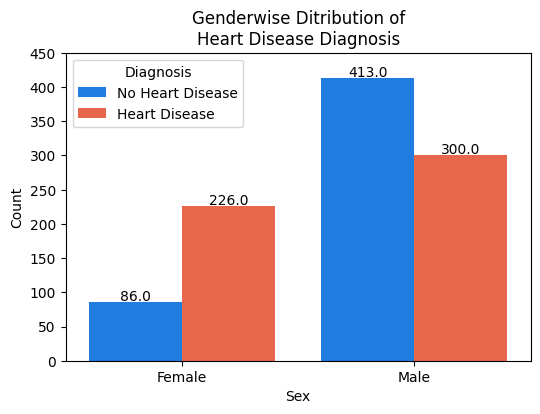

In [9]:
# Countplot based on sex

plt.figure(figsize=(6, 4))
ax = sns.countplot(x='Gender', hue='Diagnosis', data=df, palette=colors)
ax.set_xticklabels(['Female', 'Male'])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center',
                xytext=(0, 4), 
                textcoords='offset points')
plt.title('Genderwise Ditribution of\nHeart Disease Diagnosis')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.ylim([0, 450])
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['No Heart Disease', 'Heart Disease'], title='Diagnosis')
plt.savefig('Sex_CountPlot.png', dpi=600, bbox_inches='tight')
plt.show()

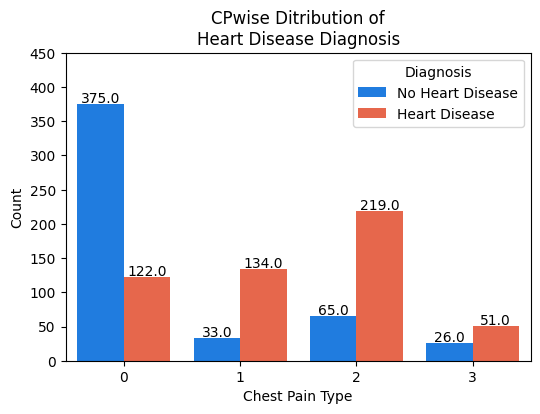

In [10]:
# Countplot based on ChestPainType

plt.figure(figsize=(6, 4))
ax = sns.countplot(x='ChestPainType', hue='Diagnosis', data=df, palette=colors)
# ax.set_xticklabels(['Female', 'Male'])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center',
                xytext=(0, 4), 
                textcoords='offset points')
plt.title('CPwise Ditribution of\nHeart Disease Diagnosis')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.ylim([0, 450])
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['No Heart Disease', 'Heart Disease'], title='Diagnosis')
plt.savefig('Sex_CountPlot.png', dpi=600, bbox_inches='tight')
plt.show()

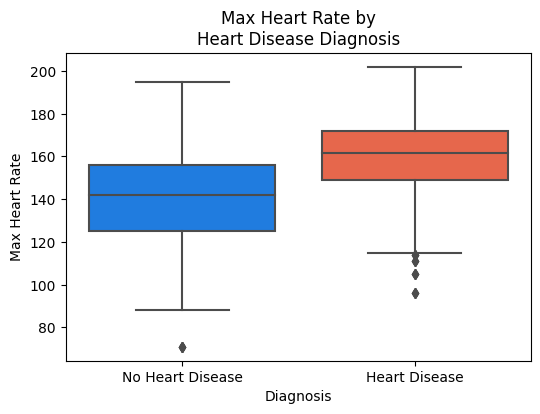

In [11]:
# MaxHeartRate

plt.figure(figsize=(6, 4))
ax = sns.boxplot(x='Diagnosis', y='MaxHeartRate', data=df, palette=colors)
plt.title('Max Heart Rate by\nHeart Disease Diagnosis')

ax.set_xticklabels(['No Heart Disease', 'Heart Disease'])
plt.xlabel('Diagnosis')
plt.ylabel('Max Heart Rate')

# plt.legend(title='Legends', loc='upper right')
plt.savefig('MaxHeartRate_Box.png', dpi=600, bbox_inches='tight')
plt.show()

In [12]:
df = df.dropna()

In [14]:
df.shape

(1025, 14)

In [15]:
df.head

<bound method NDFrame.head of       Age  Gender  ChestPainType  RestingBP  SerumCholesterol  FastingBS  \
0      52       1              0        125               212          0   
1      53       1              0        140               203          1   
2      70       1              0        145               174          0   
3      61       1              0        148               203          0   
4      62       0              0        138               294          1   
...   ...     ...            ...        ...               ...        ...   
1020   59       1              1        140               221          0   
1021   60       1              0        125               258          0   
1022   47       1              0        110               275          0   
1023   50       0              0        110               254          0   
1024   54       1              0        120               188          0   

      RestingECG  MaxHeartRate  ExerciseInducedAngina  ST

In [16]:
print(df['Diagnosis'].value_counts())

Diagnosis
1    526
0    499
Name: count, dtype: int64


In [17]:
# Upsampling


df_diagnosis_1 = df[df['Diagnosis'] == 1]
df_diagnosis_0 = df[df['Diagnosis'] == 0]

df_diagnosis_0_upsampled = df_diagnosis_0.sample(n=len(df_diagnosis_1), replace=True, random_state=42)

df_balanced = pd.concat([df_diagnosis_1, df_diagnosis_0_upsampled])
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

print(df_balanced.shape)
df = df_balanced

(1052, 14)


In [19]:
print(df.shape)

(1052, 14)


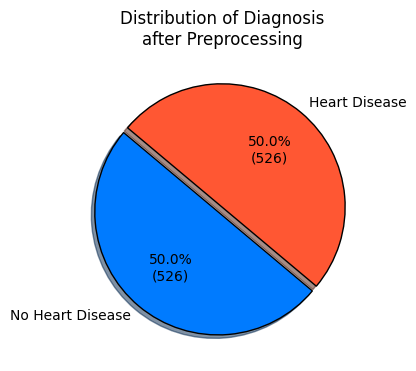

In [20]:
# New dis

diagnosis_cnts = df['Diagnosis'].value_counts()

labels = ['No Heart Disease', 'Heart Disease']
colors = [ '#007BFF', '#FF5733']

plt.figure(figsize=(4, 4)) 
plt.pie(diagnosis_cnts[[0, 1]], labels=labels, colors=colors, 
        autopct=lambda p: f'{p:.1f}%\n({int(round((p * sum(diagnosis_cnts) / 100))):,})', 
        startangle=140, explode=[0.05, 0], shadow=True, 
        wedgeprops={'edgecolor': 'black'})

plt.title("Distribution of Diagnosis\nafter Preprocessing")
plt.savefig('Dis_Preprocess.png', dpi=600, bbox_inches='tight')
plt.show()

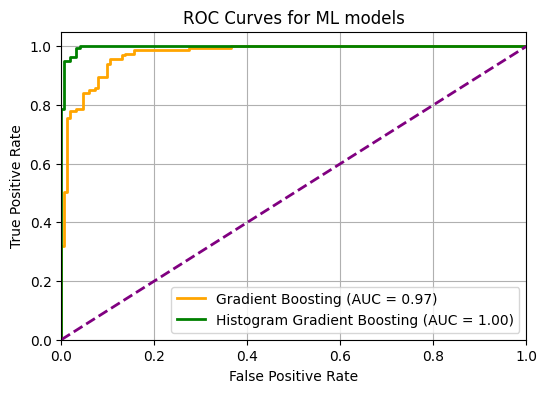

NULL removed Balancing
                         Model  Training Accuracy  Testing Accuracy  \
0            Gradient Boosting           0.951087          0.911392   
1  Histogram Gradient Boosting           0.986413          0.968354   

   Precision    Recall  Specificity  F1 Score  Jaccard Score  \
0   0.911423  0.911392     0.901961  0.911371       0.842697   
1   0.968354  0.968354     0.967320  0.968354       0.940476   

   Dice Coefficient       MCC  Log Loss  
0          0.914634  0.822602  0.271673  
1          0.969325  0.936645  0.150366  


In [21]:

X = df.drop(columns=['Diagnosis'])
y = df['Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

models = [(GradientBoostingClassifier(learning_rate=0.03, n_estimators=100), 'Gradient Boosting'), 
          (HistGradientBoostingClassifier(learning_rate=0.03, max_iter=100), 'Histogram Gradient Boosting')
]

metrics = pd.DataFrame()

basic_colors = ['orange', 'green']
log_loss_vals = []

plt.figure(figsize=(6, 4))

for (model, model_name), color in zip(models, basic_colors):
    
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    y_test_proba = model.predict_proba(X_test)[:, 1]
    
    fpr, tpr, _ = roc_curve(y_test, y_test_proba)
    roc_auc = roc_auc_score(y_test, y_test_proba)
    
    report = classification_report(y_test, y_test_pred, output_dict=True, zero_division=1)
    
    conf_matrix = confusion_matrix(y_test, y_test_pred)
    
    if conf_matrix.shape == (2, 2):
        TN, FP, FN, TP = conf_matrix.ravel()
    else:
        TN, FP, FN, TP = np.array([0, 0, 0, 0])
    
    accuracy_train = accuracy_score(y_train, y_train_pred)
    accuracy_test = accuracy_score(y_test, y_test_pred)
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1 = report['weighted avg']['f1-score']
    log_loss_value = log_loss(y_test, y_test_proba)
    log_loss_vals.append((model_name, log_loss_value))
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    jacc_score = TP / (TP + FP + FN) if (TP + FP + FN) > 0 else 0
    dice_coeff = (2 * TP) / (2 * TP + FP + FN) if (TP + FP + FN) > 0 else 0
    mcc = (TP * TN - FP * FN) / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN)) if (TP + FP) * (TP + FN) * (TN + FP) * (TN + FN) > 0 else 0
    model_res = pd.DataFrame([{
        'Model': model_name,
        'Training Accuracy': accuracy_train,
        'Testing Accuracy': accuracy_test,
        'Precision': precision,
        'Recall': recall,
        'Specificity': specificity,
        'F1 Score': f1,
        'Jaccard Score' : jacc_score,
        'Dice Coefficient' : dice_coeff,
        'MCC' : mcc,
        'Log Loss' : log_loss_value
    }])
    
    plt.plot(fpr, tpr, color=color, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')
    
    metrics = pd.concat([metrics, model_res], ignore_index=True)
    
    
plt.plot([0, 1], [0, 1], color='purple', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for ML models')
plt.legend(loc="lower right")
plt.grid(True)

roc_plot_path = 'roc_curves_heart.png'
plt.savefig(roc_plot_path, dpi=600)
plt.show()

print(metrics)

metrics_csv_path = 'metrics_hd.csv'

metrics.to_csv(metrics_csv_path, index=False)

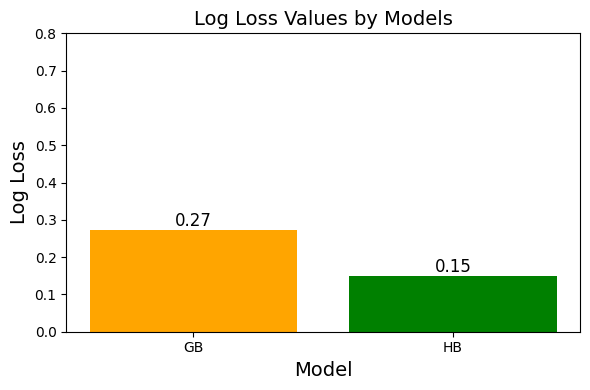

In [22]:
mods = ['GB', 'HB']
plt.figure(figsize=(6, 4))
bars = plt.bar(mods, metrics['Log Loss'], color=basic_colors)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Log Loss', fontsize=14)
plt.ylim([0, 0.8])
plt.title('Log Loss Values by Models', fontsize=14)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), 
             ha='center', va='bottom', fontsize=12)
plt.tight_layout()
plt.savefig('LogLossPlot.png', dpi=600)
plt.show()

In [23]:
import shap
HB, HBName = models[1]
HB.fit(X_train, y_train)
explainer = shap.Explainer(HB, X_train)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test, plot_type='bar', show=False)
plt.savefig('shap_summary_plot.png', dpi=600)
plt.show()